# Ad Click Prediction - Classification Problem

https://www.kaggle.com/jahnveenarang/cvdcvd-vd

**New to machine learning and data science? No question is too basic or too simple. Use this place to post any first-timer clarifying questions for the classification algorithm or related to datasets
**
!This file contains demographics about customer and whether that customer clicked the ad or not . You this file to use classification algorithm to predict on the basis of demographics of customer as independent variable

This data set contains the following features:

'User ID': unique identification for consumer
'Age': cutomer age in years
'Estimated Salary': Avg. Income of consumer
'Gender': Whether consumer was male or female
'Purchased': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats.mstats import winsorize

import math
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
data = pd.read_csv(r'Data\Social_Network_Ads.csv',encoding='latin-1')

## First Review and Clean Data

In [3]:
data.shape

(400, 5)

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Cleaning Column Names

In [17]:
data.columns

Index(['user id', 'gender', 'age', 'estimatedsalary', 'purchased'], dtype='object')

In [18]:
data.columns = data.columns.str.lower()
data.columns = [column.lower().replace(' ', '_').replace('/', '_') for column in data.columns]

In [19]:
data.columns

Index(['user_id', 'gender', 'age', 'estimatedsalary', 'purchased'], dtype='object')

### Review DTypes

In [20]:
data.dtypes

user_id             int64
gender             object
age                 int64
estimatedsalary     int64
purchased           int64
dtype: object

In [21]:
# boolean columns death_event, smoking, sex, high_blood_pressure, diabetes, anaemia

#data = data.astype({'death_event':'boolean', 'sex':'boolean', 'smoking':'boolean', 'high_blood_pressure':'boolean','diabetes':'boolean','anaemia':'boolean','age':'int64'})

In [22]:
data.dtypes

user_id             int64
gender             object
age                 int64
estimatedsalary     int64
purchased           int64
dtype: object

### Null Values

In [23]:
data.isna().any()

user_id            False
gender             False
age                False
estimatedsalary    False
purchased          False
dtype: bool

No null values present in this dataset

### Drop Duplicates

In [24]:
data.shape

(400, 5)

In [25]:
data = data.drop_duplicates()

In [26]:
data.shape

(400, 5)

No duplicates present in this dataset

### Is user_id unique?

In [30]:
data.user_id.is_unique

True

In [31]:
data = data.set_index('user_id')

### Data Values

In [32]:
for col in data:
    print(data[col].value_counts(), '\n')

Female    204
Male      196
Name: gender, dtype: int64 

35    32
37    20
41    16
42    16
26    16
39    15
40    15
47    14
48    14
38    13
27    13
28    12
46    12
36    12
31    11
30    11
29    10
49    10
32     9
33     9
24     9
20     7
19     7
60     7
59     7
45     7
25     6
34     6
58     6
52     6
23     6
57     5
22     5
18     5
53     5
21     4
50     4
54     4
55     3
43     3
56     3
51     3
44     2
Name: age, dtype: int64 

72000     12
80000     11
79000     10
71000      9
75000      9
          ..
142000     1
100000     1
37000      1
114000     1
64000      1
Name: estimatedsalary, Length: 117, dtype: int64 

0    257
1    143
Name: purchased, dtype: int64 



## Explore Cleaned Data

### Check for Correlation

In [33]:
round(data.corr()['purchased'].sort_values(ascending=False),2)

purchased          1.00
age                0.62
estimatedsalary    0.36
Name: purchased, dtype: float64

# create correlation heatmap 

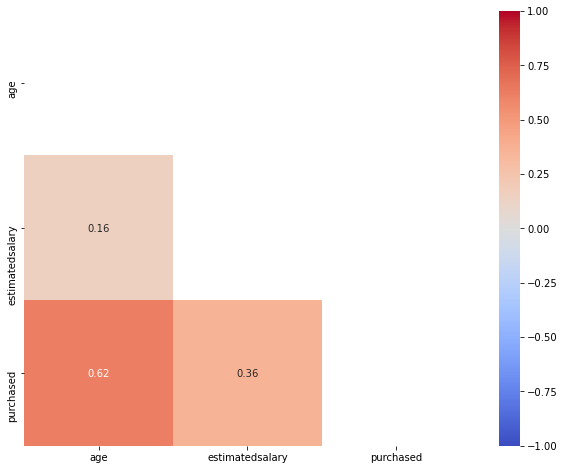

In [34]:
mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

plt.show()

Just having a first looka at correlation none of the features shows a high correlation with the target variable (death_event)

### Review Variable by Variable

#### Impact of the gender on death_event

In [35]:
import plotly.express as px

In [37]:
pd.value_counts(data['gender']).plot.bar()
plt.title('heart_failure')
plt.xlabel('death_event')
plt.ylabel('Frequency')
data['gender'].value_counts()

## Deal with Data Imbalance

### Check if the Data is imbalanced

In [38]:
data['purchased'].value_counts()

0    257
1    143
Name: purchased, dtype: int64

**YES** our data is imbalanced, as we have 257 False values and 143 True values

0    257
1    143
Name: purchased, dtype: int64

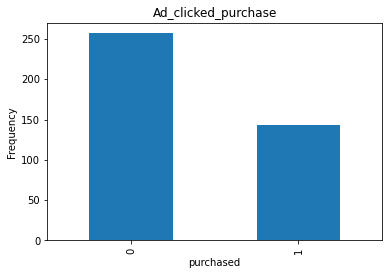

In [39]:
pd.value_counts(data['purchased']).plot.bar()
plt.title('Ad_clicked_purchase')
plt.xlabel('purchased')
plt.ylabel('Frequency')
data['purchased'].value_counts()